# Workshop Prep

Learning to use github, discovering the narrative of the bank train data set, and figuring out what to showcase at the Workbench demo

In [1]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data

bank = pd.read_csv("./bank.csv")
print("Training data shape", bank.shape)

bank_score = pd.read_csv("./Bank_Score.csv")
print("Testing data shape", bank_score.shape)

Training data shape (108600, 21)
Testing data shape (225068, 20)


# Imputation

In [3]:
bank.info()

#no status - meant for model to predict and then to be validated
#we do not have the answers now so ignore

bank_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108600 entries, 0 to 108599
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AccountID        108600 non-null  int64  
 1   Status           108600 non-null  int64  
 2   Customer_Value   108600 non-null  object 
 3   Age              81143 non-null   float64
 4   Home_Flag        108600 non-null  int64  
 5   Homeval          108600 non-null  int64  
 6   Inc              108600 non-null  int64  
 7   Pr               108600 non-null  int64  
 8   Activity_Status  108600 non-null  object 
 9   AvgSale3Yr       108600 non-null  float64
 10  AvgSaleLife      108600 non-null  float64
 11  AvgSale3Yr_DP    85445 non-null   float64
 12  LastProdAmt      108600 non-null  float64
 13  CntPur3Yr        108600 non-null  int64  
 14  CntPurLife       108600 non-null  int64  
 15  CntPur3Yr_DP     108600 non-null  int64  
 16  CntPurLife_DP    108600 non-null  int6

In [4]:
bank.isna().sum()

AccountID              0
Status                 0
Customer_Value         0
Age                27457
Home_Flag              0
Homeval                0
Inc                    0
Pr                     0
Activity_Status        0
AvgSale3Yr             0
AvgSaleLife            0
AvgSale3Yr_DP      23155
LastProdAmt            0
CntPur3Yr              0
CntPurLife             0
CntPur3Yr_DP           0
CntPurLife_DP          0
CntTotPromo            0
MnthsLastPur           0
Cnt1Yr_DP              0
CustTenure             0
dtype: int64

In [5]:
#age and average sale 3 year sto direct promotion only ones missing values 
print("portion missing of age")
print(27457/len(bank))
print("portion missing of avgsale3yrdp")
print(23155/len(bank))

portion missing of age
0.2528268876611418
portion missing of avgsale3yrdp
0.21321362799263352


In [6]:
#will need to do some imputation and see if variables are strong enough to keep later on 



age_mean = bank["Age"].mean()
yr3_mean = bank["AvgSale3Yr_DP"].mean()

In [7]:
#fill with mean
bank['Age'].fillna(age_mean, inplace=True)
bank["AvgSale3Yr_DP"].fillna(yr3_mean, inplace=True)

/tmp/ipykernel_103/568254872.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank['Age'].fillna(age_mean, inplace=True)
/tmp/ipykernel_103/568254872.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [8]:
bank.duplicated().sum()

0

# EDA

In [9]:
def plot_distribution(column):
    labels = column.value_counts().index
    values = column.value_counts().values

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    axs[0].set_title(f'{column.name} Distribution (Pie Chart)')

    axs[1].bar(labels, values)
    axs[1].set_title(f'{column.name} Distribution (Bar Chart)')
    axs[1].set_xlabel(column.name)
    axs[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

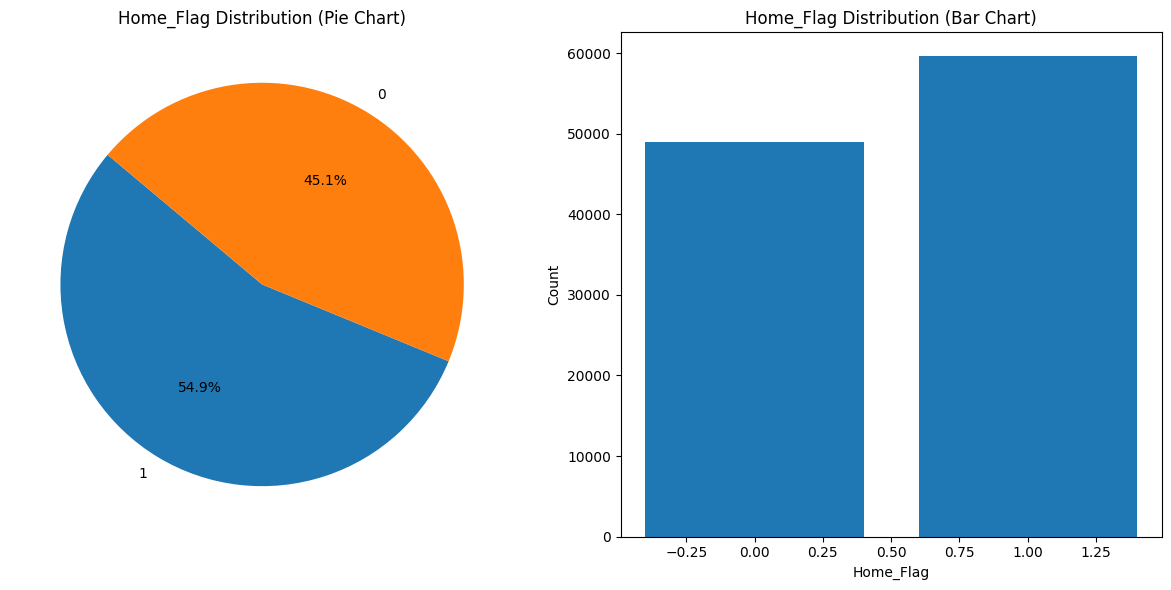

In [10]:
plot_distribution(bank["Home_Flag"])

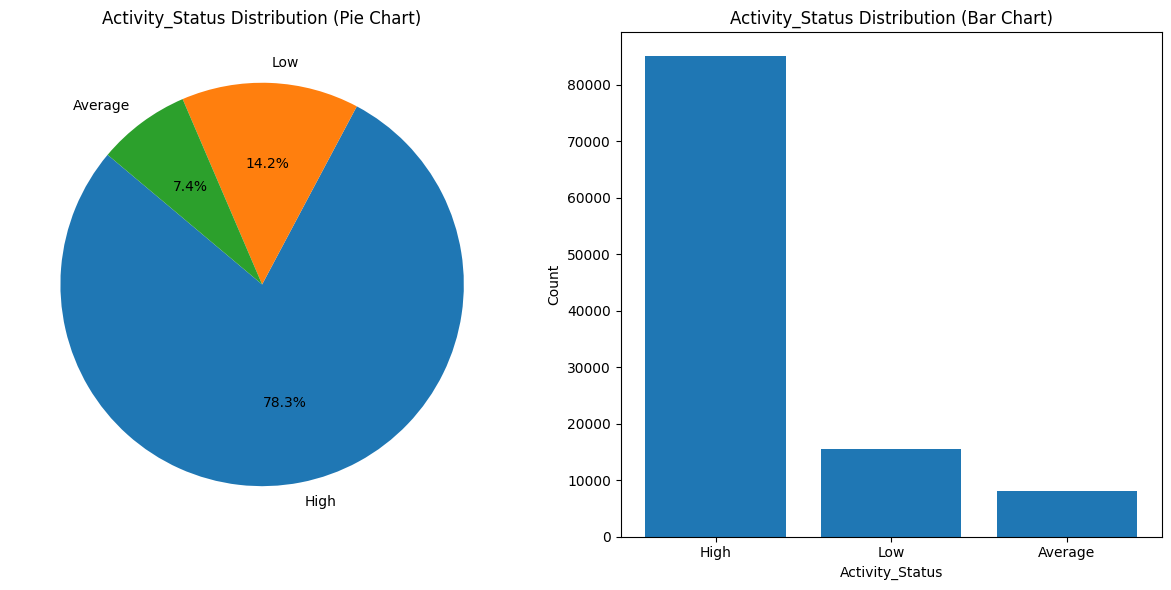

In [11]:
plot_distribution(bank["Activity_Status"])

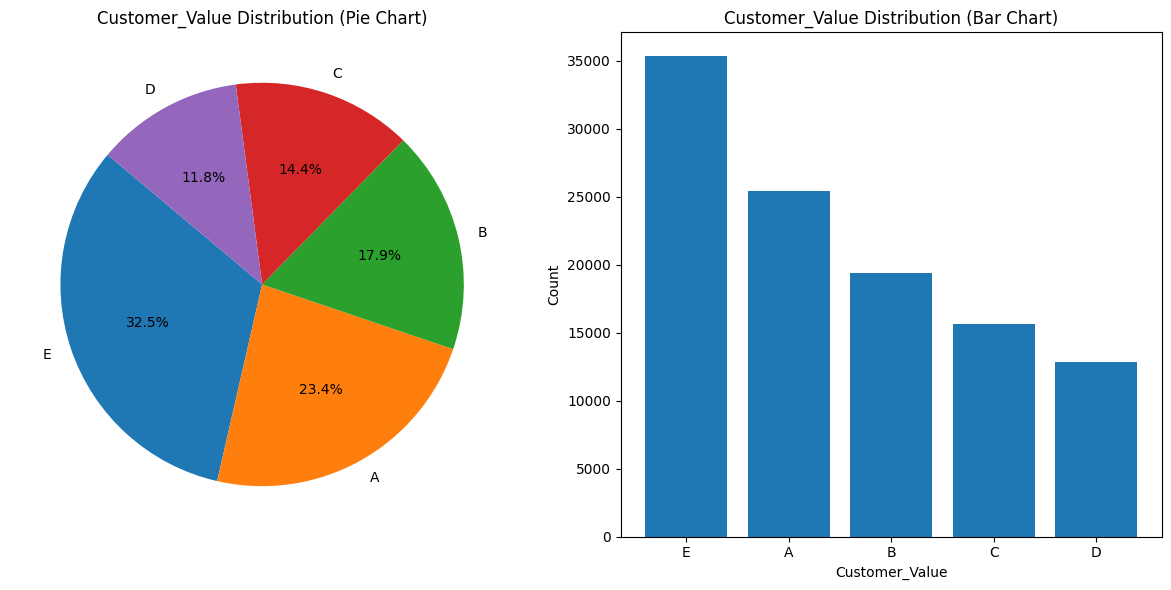

In [12]:
plot_distribution(bank["Customer_Value"])

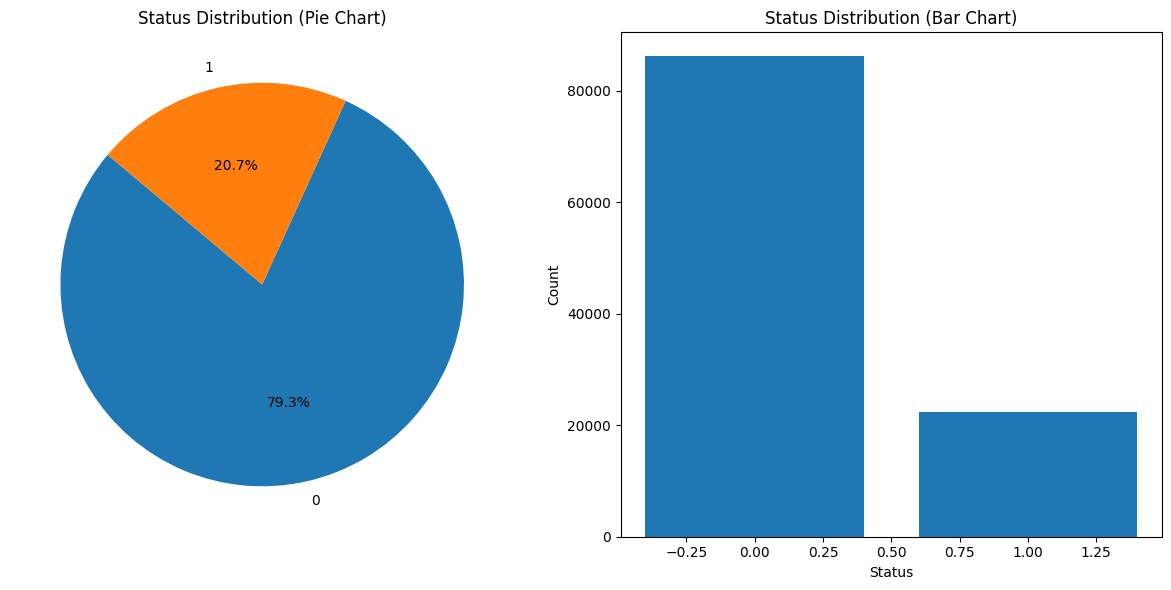

In [13]:
#looking at target column

plot_distribution(bank["Status"])


#unbalanced data

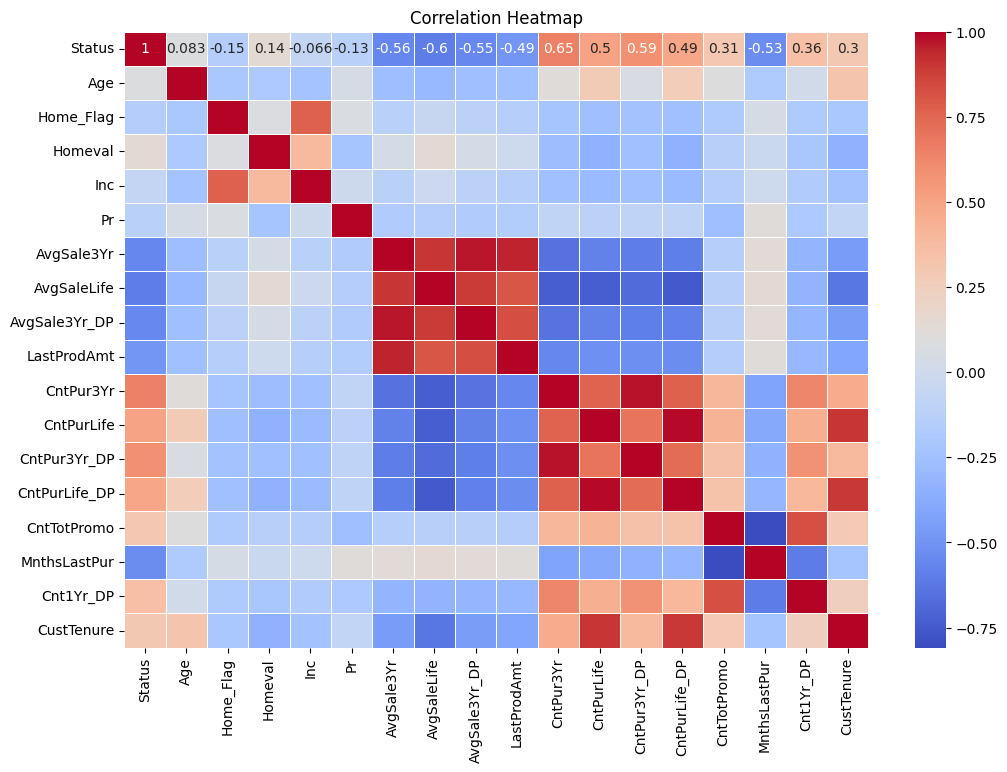

In [14]:
# Correlation heatmap
numerical_df = bank.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_df.drop(columns=["AccountID"], errors='ignore').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


this shows that as your avergage sale value rises , number of products purchased falls - the larger the purchase the less quantity of product you purchase

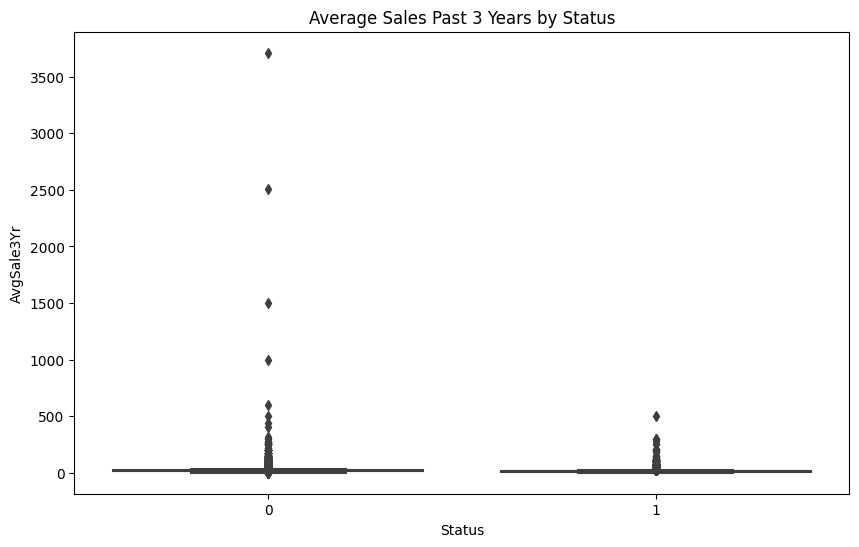

In [15]:
# Boxplot to visualize relationship between categorical and numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='AvgSale3Yr', data=bank)
plt.title('Average Sales Past 3 Years by Status')
plt.show()

#doesnt help much

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


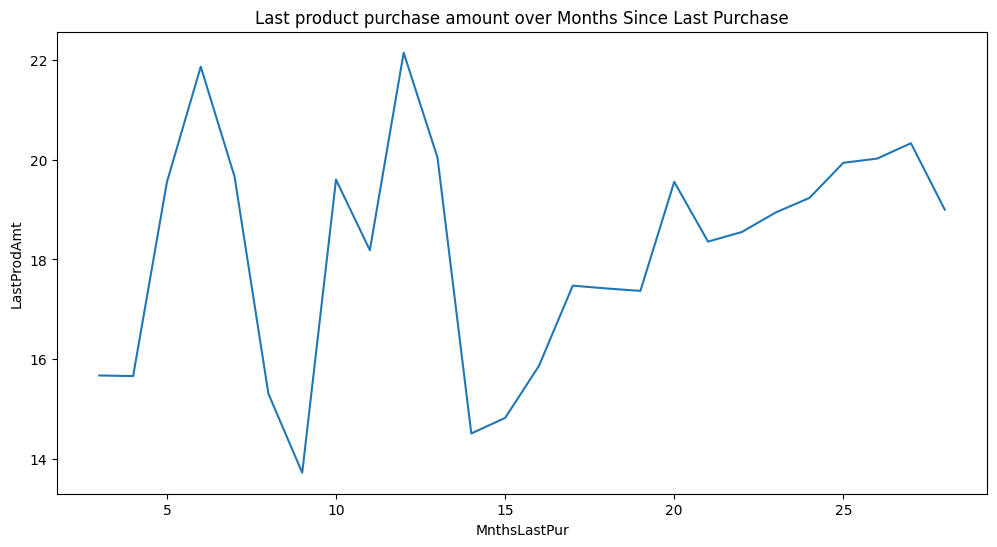

In [16]:
# Line plot for time series analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='MnthsLastPur', y='LastProdAmt', data=bank, errorbar=None)
plt.title('Last product purchase amount over Months Since Last Purchase')
plt.show()


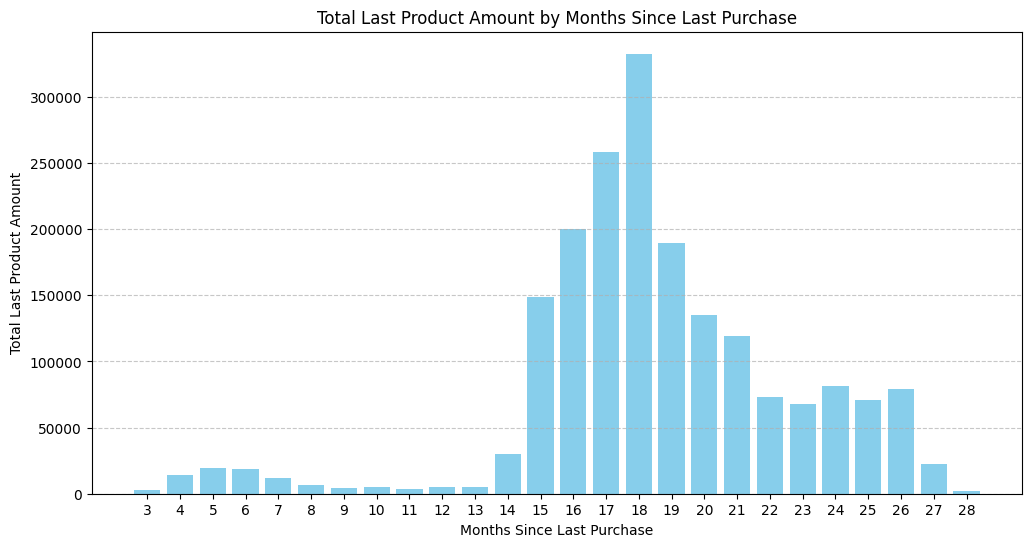

In [17]:

# Assuming 'bank' is your DataFrame with relevant columns 'MnthsLastPur' and 'LastProdAmt'
# Aggregate data to calculate total LastProdAmt for each month
monthly_total = bank.groupby('MnthsLastPur')['LastProdAmt'].sum().reset_index()

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_total['MnthsLastPur'], monthly_total['LastProdAmt'], color='skyblue')
plt.xlabel('Months Since Last Purchase')
plt.ylabel('Total Last Product Amount')
plt.title('Total Last Product Amount by Months Since Last Purchase')
plt.xticks(monthly_total['MnthsLastPur'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


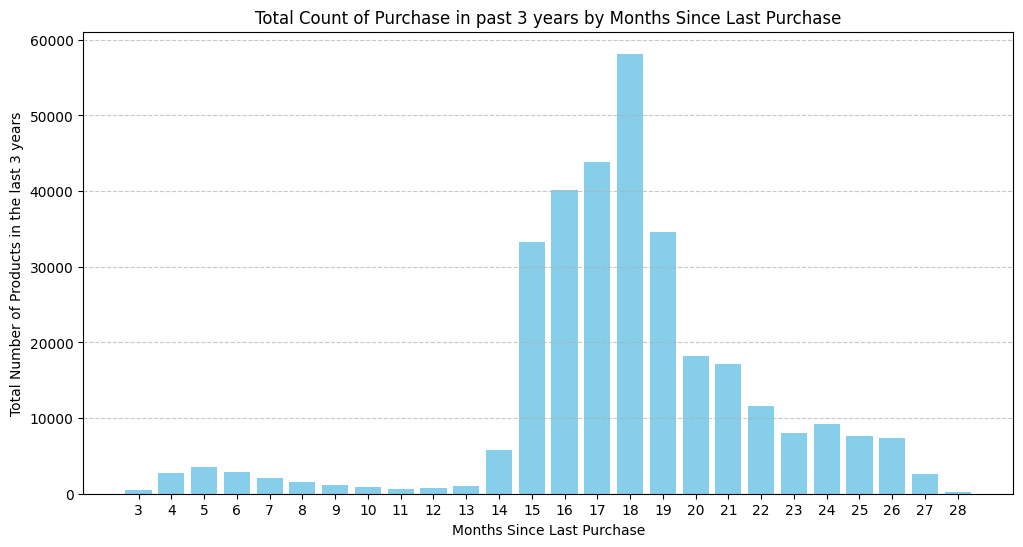

In [18]:

# Assuming 'bank' is your DataFrame with relevant columns 'MnthsLastPur' and 'LastProdAmt'
# Aggregate data to calculate total LastProdAmt for each month
monthly_total = bank.groupby('MnthsLastPur')['CntPur3Yr'].sum().reset_index()

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_total['MnthsLastPur'], monthly_total['CntPur3Yr'], color='skyblue')
plt.xlabel('Months Since Last Purchase')
plt.ylabel('Total Number of Products in the last 3 years')
plt.title('Total Count of Purchase in past 3 years by Months Since Last Purchase')
plt.xticks(monthly_total['MnthsLastPur'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


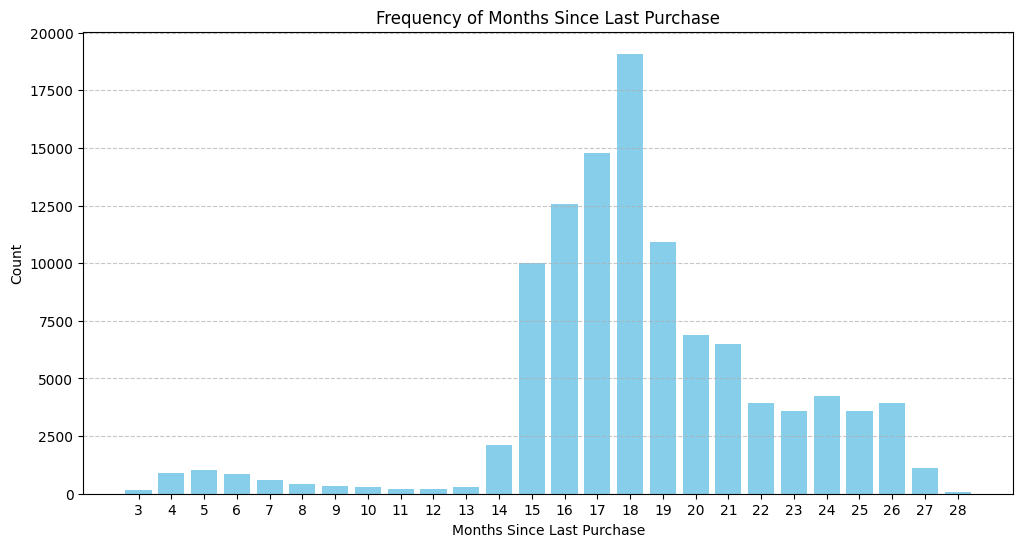

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'bank' is your DataFrame with the 'MnthsLastPur' column
# Calculate the frequency of each unique value in MnthsLastPur
month_counts = bank['MnthsLastPur'].value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(month_counts.index, month_counts.values, color='skyblue')
plt.xlabel('Months Since Last Purchase')
plt.ylabel('Count')
plt.title('Frequency of Months Since Last Purchase')
plt.xticks(month_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


this one shows that most people tend to wait between 15 and 21 months between purchases

In [21]:
bank["LastProdAmt"]

# Calculate mean
mean_value = bank["LastProdAmt"].mean()

# Calculate median
median_value = bank["LastProdAmt"].median()

# Calculate mode (note: mode could be multiple values, so it returns a Series)
mode_value = bank["LastProdAmt"].mode()

# Calculate range
range_value = bank["LastProdAmt"].max() - bank["LastProdAmt"].min()


#print
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")  # Mode could be a list/array
print(f"Range: {range_value}")


Mean: 17.562853130755062
Median: 15.0
Mode: 0    15.0
Name: LastProdAmt, dtype: float64
Range: 10001.0


In [22]:
bank["LastProdAmt"].min()

-1.0

In [23]:
bank["LastProdAmt"].max()

10000.0

need to check out how to replace last prod -1 , unless that means returns but idk man doesnt look right

yay jackson
